In [8]:
# import required libraries
import numpy as np
import pandas as pd
from scipy.stats import zscore
from xgboost import XGBRegressor

# import trainning data
data = pd.read_csv(r'C:\Users\DUSHYANT\Downloads\train_data.xlsx - Sheet1.csv')
data=data.sample(frac=1).reset_index(drop=True)
# data cleaning
data =data.dropna(subset=['Lat',"Case_Fatality_Ratio","Deaths","Long_"]) #remove nulll values
data=data[data["Case_Fatality_Ratio"]<100]  #removing outliers
data["confirmed"]=(data["Deaths"]/data["Case_Fatality_Ratio"])*100  #calculating confirmed case from formula
data=data.fillna(0)  #adjusting infinite values
data=data[data["confirmed"]<50000] #removing outliers

X = data[["Lat","Long_"]]
#target variables
y = data['Deaths']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)



**KNN**

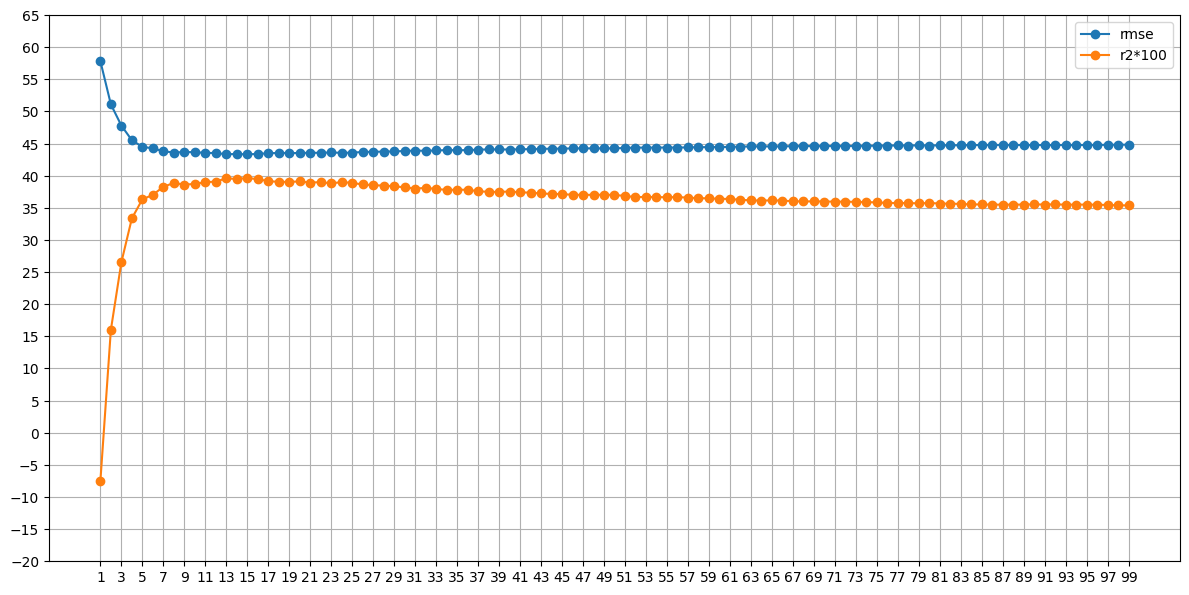

Best k based on RMSE: 15, RMSE: 43.3191
Best k based on R²: 15, R²: 0.3963


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
k_values=range(1,100)

rmse_score=[]
r2=[]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    rmse_score.append(root_mean_squared_error(y_test,y_pred))
    r2.append(r2_score(y_test,y_pred)*100)


plt.figure(figsize=(12, 6))
plt.plot(k_values, rmse_score, marker='o',label="rmse")
plt.plot(k_values, r2, marker='o',label="r2*100")
plt.legend()
plt.tight_layout()
plt.grid(True)  
plt.xticks(np.arange(min(k_values), max(k_values) + 1, 2)) 
plt.yticks(np.arange(-20,70, 5))  
plt.show()



# Best k based on RMSE
best_k_rmse = k_values[np.argmin(rmse_score)]
best_rmse = min(rmse_score)
print(f'Best k based on RMSE: {best_k_rmse}, RMSE: {best_rmse:.4f}')
# Best k based on R2 score
best_k_r2 = k_values[np.argmax(r2)]
best_r2 = max(r2)/100
print(f'Best k based on R²: {best_k_r2}, R²: {best_r2:.4f}')